B N N B B B B B N B B N B B B N B B B B
B N B B B B N N N B B B B N B B B N B N
N N B B B N B B N B N B B B B N N B N B
N N B N B N B N B B B B B N B B B N B B
N B N B B N B B B B N B B B N B B B B B
B N B B B B B B B B B B N B B B B N B B
B B N N N B B N N B B B B B N B B B B B
B B B N B B B B B N B N N B N N B B B N
B N N B B B N B B B B B N B N N B B B N
N B B B B N N B B N B B N B B B B B B B
B B B B B N N B B N B N B N N B B B B B
B B B B B N B N B B B N B B N B B N N B
B B B B B B B N N B N B N B N B B B B B
B N N N B B B B B B B B N B B N N N B B
B B B B B B B B B B B B B B N B N B B B
B B B N N B B N B B B B N B N B B B N B
B B N B B B N N B B B B B B B B N N N B
N B B B B N B B B N B B B N B B B B B B
B B B B N B N N N B B N B N B B N B N N
N B B B B N B B N B N B B B B N B B B B


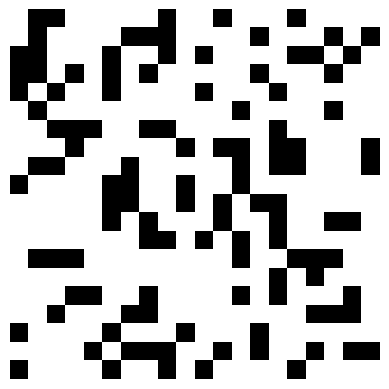

In [10]:
import numpy as np
import matplotlib.pyplot as plt

class Grid:
    def __init__(self, rows, cols, black_count):
        self.rows = rows
        self.cols = cols
        self.grid = [['B' for _ in range(cols)] for _ in range(rows)]
        self.generate_black_cells(black_count)

    def generate_black_cells(self, black_count):
        for _ in range(black_count):
            row = np.random.randint(0, self.rows)
            col = np.random.randint(0, self.cols)
            self.grid[row][col] = 'N'

    def get_cell(self, row, col):
        return self.grid[row][col]

    def set_cell(self, row, col, status):
        self.grid[row][col] = status

    def display(self):
        for row in self.grid:
            print(' '.join(row))

    def plot(self):
        plt.imshow([[0 if cell == 'B' else 1 for cell in row] for row in self.grid], cmap='binary')
        plt.axis('off')
        plt.show()

# Exemple d'utilisation
rows = 20
cols = 20
black_count = 130
grid = Grid(rows, cols, black_count)
grid.display()  # Afficher la grille dans la console
grid.plot()  # Afficher la grille avec matplotlib



In [14]:
def is_connected(grid):
    def dfs(row, col):
        visited.add((row, col))
        for dr, dc in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
            new_row, new_col = row + dr, col + dc
            if 0 <= new_row < rows and 0 <= new_col < cols and grid[new_row][new_col] == 'B' and (new_row, new_col) not in visited:
                dfs(new_row, new_col)

    rows = len(grid)
    cols = len(grid[0])
    visited = set()

    # Trouver la première case blanche comme point de départ
    for i in range(rows):
        for j in range(cols):
            if grid[i][j] == 'B':
                start_row, start_col = i, j
                break
        else:
            continue
        break
    else:
        # Aucune case blanche trouvée
        return False

    # Parcours en profondeur à partir du point de départ
    dfs(start_row, start_col)

    # Vérifier si toutes les cases blanches ont été visitées
    for i in range(rows):
        for j in range(cols):
            if grid[i][j] == 'B' and (i, j) not in visited:
                return False

    return True

# Exemple d'utilisation
grid = [
    ['B', 'N', 'B', 'B'],
    ['B', 'B', 'N', 'B'],
    ['B', 'N', 'B', 'B'],
    ['B', 'B', 'B', 'B']
]

print(is_connected(grid))  # Renvoie False


True


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

class TreeNode:
    def __init__(self, position, path_so_far=None):
        self.position = position
        if path_so_far:
            self.path = path_so_far + [position]
        else:
            self.path = [position]
        self.children = []

def find_paths(grid, start, end):
    def is_valid_move(row, col):
        return 0 <= row < len(grid) and 0 <= col < len(grid[0]) and grid[row][col] != 'X'

    def explore_path(node):
        row, col = node.position
        if (row, col) == end:
            paths.append(node.path)
        else:
            for dr, dc in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
                new_row, new_col = row + dr, col + dc
                if is_valid_move(new_row, new_col) and (new_row, new_col) not in visited:
                    visited.add((new_row, new_col))
                    child_node = TreeNode((new_row, new_col), node.path)
                    node.children.append(child_node)
                    explore_path(child_node)
                    visited.remove((new_row, new_col))

    paths = []
    visited = set()
    root = TreeNode(start)
    visited.add(start)
    explore_path(root)
    return paths





In [ ]:
def find_shortest_path(paths):
    shortest_path = min(paths, key=len)
    return shortest_path

Tous les chemins possibles vers la destination : [[(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (2, 3), (2, 4), (3, 4), (4, 4)], [(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (1, 4), (2, 4), (3, 4), (4, 4)], [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (2, 4), (3, 4), (4, 4)], [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (1, 3), (2, 3), (2, 4), (3, 4), (4, 4)]]
Le chemin le plus court : [(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (2, 3), (2, 4), (3, 4), (4, 4)]


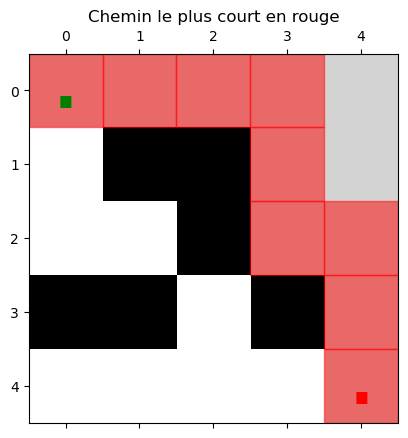

In [24]:
def display_grid_with_paths(grid, all_paths, shortest_path):
    grid_np = np.zeros_like(grid, dtype=int)  

    # Convert the grid into a numerical matrix for easier manipulation
    for i in range(len(grid)):
        for j in range(len(grid[0])):
            if grid[i][j] == 'X':
                grid_np[i][j] = -1  # Mark obstacles with -1
            elif (i, j) in shortest_path:
                grid_np[i][j] = 2  # Mark cells in the shortest path with 2
            elif (i, j) in [p for path in all_paths for p in path]:
                grid_np[i][j] = 1  # Mark other paths with 1

    # Create the figure and axis for display
    fig, ax = plt.subplots()

    # Create a custom colormap where 0 (white) represents free space, 1 (light gray) represents other paths,
    # and 2 (red) represents the shortest path
    cmap = plt.matplotlib.colors.ListedColormap(['black', 'white', 'lightgray'])

    # Display the grid
    ax.matshow(grid_np, cmap=cmap)

    # Display the grid with cell values
    for i in range(len(grid_np)):
        for j in range(len(grid_np[0])):
            if grid_np[i][j] != -1:  # Do not display obstacles
                ax.text(j, i, str(grid[i][j]), va='center', ha='center')

    # Mark the start and end points
    ax.text(shortest_path[0][1], shortest_path[0][0], '.', color='green', va='center', ha='center', fontweight='bold', fontsize=45)
    ax.text(shortest_path[-1][1], shortest_path[-1][0], '.', color='red', va='center', ha='center', fontweight='bold', fontsize=45)


    # Highlight the shortest path cells
    for pos in shortest_path:
        ax.add_patch(plt.Rectangle((pos[1] - 0.5, pos[0] - 0.5), 1, 1, color='red', alpha=0.5))

    # Show the grid with the shortest path highlighted
    plt.title('Chemin le plus court en rouge')
    plt.show()

# Example Usage
grid = [
    [' ', ' ', ' ', ' ', ' '],
    [' ', 'X', 'X', ' ', ' '],
    [' ', ' ', 'X', ' ', ' '],
    ['X', 'X', ' ', 'X', ' '],
    [' ', ' ', ' ', ' ', ' ']
]

start = (0, 0)
end = (4, 4)

all_paths = find_paths(grid, start, end)
shortest_path = find_shortest_path(all_paths)

print("Tous les chemins possibles vers la destination :", all_paths)
print("Le chemin le plus court :", shortest_path)

display_grid_with_paths(grid, all_paths, shortest_path)
